# Tide Level Predictions

This notebook uses the NOAA CO-OPS API to retreive the tide levels for the Richmond, CA station.  

```
https://tidesandcurrents.noaa.gov/api/
```

In [15]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib notebook

## Retrieve Data

In [17]:
predictions = []
payload = {
    'begin_date': '',
    'end_date': '',
    'station': '9414863',
    'product': 'predictions',
    'datum': 'mllw',
    'units': 'english',
    'time_zone': 'gmt',
    'application': 'web_services',
    'format': 'json'
}

for i in range(2018, 2030):
    print('Retrieving data for', i)
    payload['begin_date'] = str(i) + '0101'
    payload['end_date'] = str(i) + '0630'
    r = requests.get('https://tidesandcurrents.noaa.gov/api/datagetter', params=payload)
    predictions.extend(json.loads(r.text)['predictions'])
    payload['begin_date'] = str(i) + '0701'
    payload['end_date'] = str(i) + '1231'
    r = requests.get('https://tidesandcurrents.noaa.gov/api/datagetter', params=payload)
    predictions.extend(json.loads(r.text)['predictions'])

Retrieving data for 2018
Retrieving data for 2019
Retrieving data for 2020
Retrieving data for 2021
Retrieving data for 2022
Retrieving data for 2023
Retrieving data for 2024
Retrieving data for 2025
Retrieving data for 2026
Retrieving data for 2027
Retrieving data for 2028
Retrieving data for 2029


In [18]:
values = list(map(lambda x: float(x['v']), predictions))
dates = list(map(lambda x: datetime.strptime(
    x['t'], '%Y-%m-%d %H:%M'), predictions))

## Plot Results

<IPython.core.display.Javascript object>


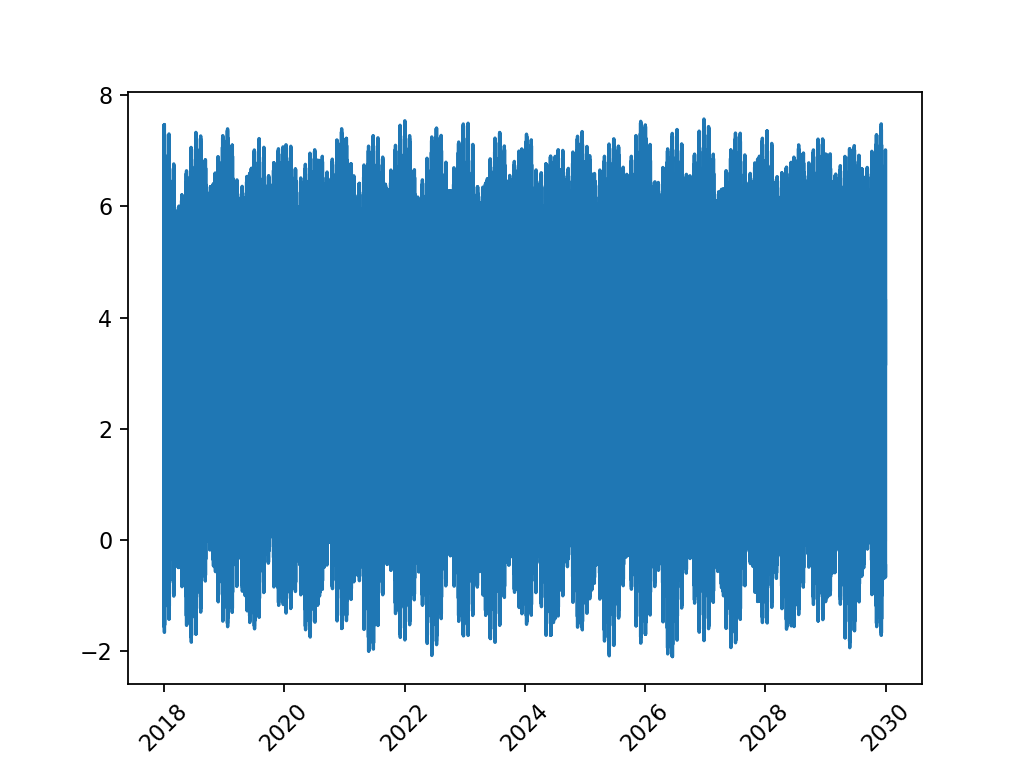

In [20]:
plt.plot(dates, values)
plt.xticks(rotation=45)
plt.show()

## Save Observations

In [22]:
dataset = pd.DataFrame({'DateTime': dates, 'Height': values})
dataset.to_csv('tidelevels_9414863.csv', index=False)